In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#  Loading Data

path = "/content/drive/MyDrive/DataSource/Chapter06DataSet.csv"
load_data = pd.read_csv(path)

In [4]:
# Membuat data frame

df=pd.DataFrame(load_data)
df.head()

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1


# Bussines Understanding

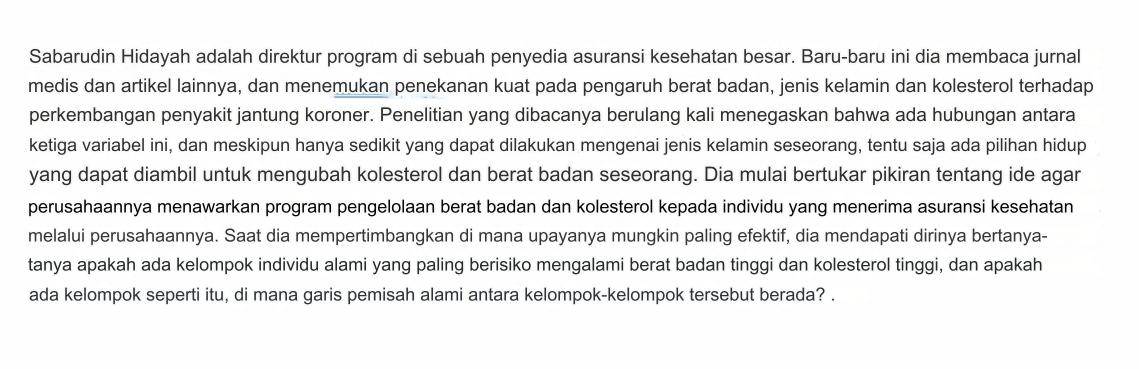

- Problem: Clustering (Unsupervised)
- Goal : Prediktif tingkat resiko jantung koroner dengan metode clustering
- Algoritma: K-Means

# Data Understanding

In [5]:
df

,Weight,Cholesterol,Gender
0,102,111,1
1,115,135,1
2,115,136,1
3,140,167,0
4,130,158,1
...,...,...,...
542,172,207,1
543,129,157,1
544,107,115,1
545,117,147,1


In [6]:
import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df, *['Cholesterol', 'Gender'], **{})
chart

<Figure size 600x600 with 0 Axes>

Kolestrol Total:

- Normal: Kurang dari 200 mg/dL.
- Borderline tinggi: 200-239 mg/dL.
- Tinggi: 240 mg/dL atau lebih.

LDL Kolesterol:

- Optimal: Kurang dari 100 mg/dL.
- Normal: 100-129 mg/dL.
- Borderline tinggi: 130-159 mg/dL.
- Tinggi: 160-189 mg/dL.
- Sangat tinggi: 190 mg/dL atau lebih.

In [7]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df, *['Cholesterol'], **{})
chart

## Cholestrol berdasarkan jumlah nasabah

1. 50 lebih nasabah terindikasi High kolestrol (>200)

In [8]:
import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(df, *['Weight', 'Cholesterol'], **{})
chart

<Figure size 600x600 with 0 Axes>

## Cholestrol & Weight

Ada pola hubungan berbanding lurus, dimana jika weight besar maka kolestrol tinggi

In [9]:


chart = scatter_plot(df, *['Gender', 'Cholesterol'], **{})
chart

<Figure size 600x600 with 0 Axes>

# Data preparation

## Cholestrol & Gender

Antra laki-laki dan perempuan berpeluang kolestrol tinngi

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Weight       547 non-null    int64
 1   Cholesterol  547 non-null    int64
 2   Gender       547 non-null    int64
dtypes: int64(3)
memory usage: 12.9 KB


In [11]:
df.isnull().sum()

Weight         0
Cholesterol    0
Gender         0
dtype: int64

Tidak dilakukan preparasi data, karena data bersih

# Modeling Clustering:

## Evaluasi Clustering
1. Dibutuhkan untuk menentukan berapa nilai k yg akan diinput ke dalam n_cluster
2. Akan digunakan Teknik Elbow untuk menemukan nilai K yg optimum

In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [13]:
# Input

x= df[['Weight','Cholesterol','Gender']]

## Elbow method
 Elbow method adalah teknik yang digunakan menentukan n cluster, dimana n adalah yg terbaik

 WSS= Within-Cluster Sum of Squares, metrix yg digunakan untuk mengukur cluster

 Nilai n terbaik versi elbow adalah 3 & 4

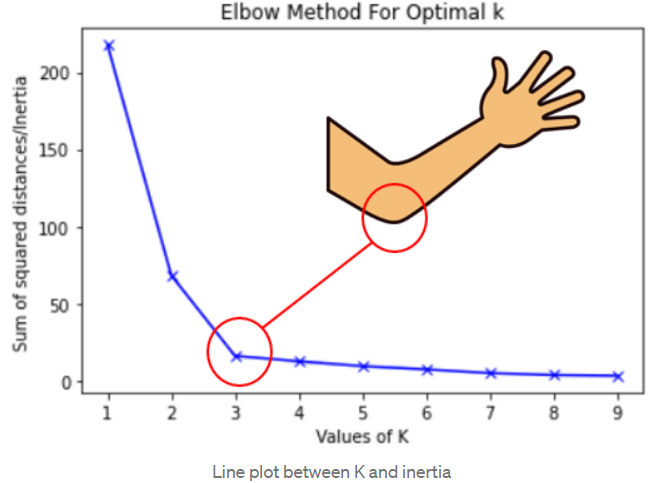

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

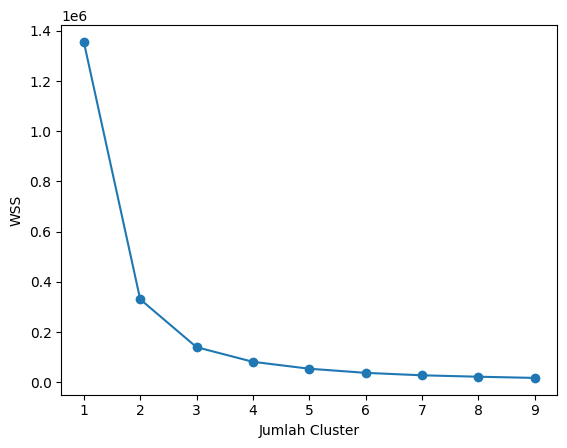

In [14]:
# Elbow Method
cluster_range=range(1,10)
cluster_wss=[]
for num_cluster in cluster_range:
  clusters=KMeans(num_cluster)
  clusters.fit(x)
  cluster_wss.append(clusters.inertia_)

plt.xlabel('Jumlah Cluster')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker="o")
plt.show()

# Clustering K-Means

In [15]:
cls=KMeans(n_clusters=4, random_state=0)
# membentuk model
model_cls=cls.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
df['cluster']=model_cls.labels_
df.head()

,Weight,Cholesterol,Gender,cluster
0,102,111,1,1
1,115,135,1,1
2,115,136,1,1
3,140,167,0,2
4,130,158,1,2


In [17]:
df['cluster'].value_counts()

1    152
0    147
2    140
3    108
Name: cluster, dtype: int64

In [18]:
import plotly.express as px

In [19]:
fig = px.scatter(df, x="Weight", y="Cholesterol", color="cluster",
                 size='Weight', hover_data=['Cholesterol'])
fig.show()

## Hasil cluster

Didapatkan 4 kelompok org yg berisiko jantung koroner:
- cluster 0 (high risk) = Cluster High risk merupakan kelompok nasabah yang punya resiko tinggi jantung koroner
- cluster 3 (potensial high risk) = kelompok nasabah yang mempunyai kecendrungan resiko tinggi jantung koroner hal ini ditunjukkan oleh tingkat berat dan kolesterol pada ambang batas normal
- cluster 2 (medium risk) = kelompok nasabah yg berada diantara low risk dan potensial risk
- cluster 1 (low risk) = kelompok nasabah yg memiliki risiko rendah


Berapa jumlah nasabah yg akan diprospek untuk mengikuti program baru treatment mengurangi risiko jantung koroner?

Penjumlahan cluster 0 dan 3 = 255